# Importing the necessary libraries


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [52]:
!pip install pandas_profiling

# Importing the data frame


In [53]:
df = !gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv
df = pd.read_csv('aerofit_treadmill.csv')
df.head()


,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


To check the shape & size of the data frame

In [54]:
df.shape

(180, 9)

In [55]:
df.size

1620

In [56]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [57]:
from ydata_profiling import ProfileReport

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [59]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Data analysis steps like checking the structure & characteristics of the dataset

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Checking for Null or missing values in each column

In [61]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [62]:
df.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


#Find the outliers for every continuous variable in the dataset

In [63]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


Text(0.5, 1.0, 'Education')

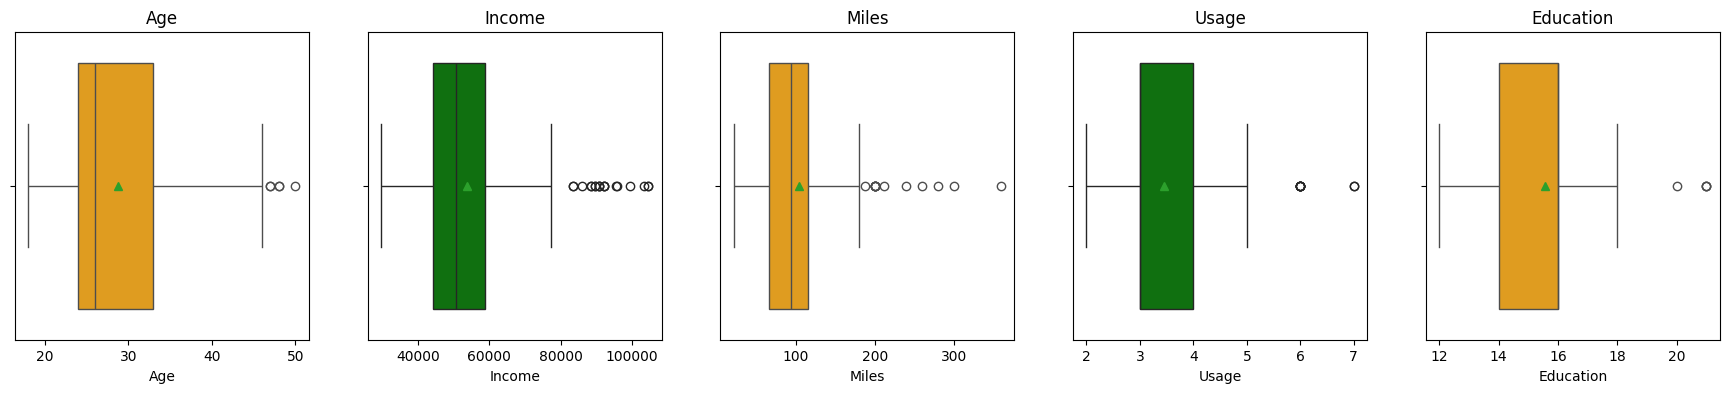

In [64]:
fig, axes = plt.subplots(1, 5, figsize=(22, 4))
sns.boxplot(ax=axes[0], x="Age", showmeans=True, data=df, color = 'orange')
axes[0].set_title('Age')
sns.boxplot(ax=axes[1], x="Income", showmeans=True, data=df, color = 'green')
axes[1].set_title('Income')
sns.boxplot(ax=axes[2], x="Miles", showmeans=True, data=df, color = 'orange')
axes[2].set_title('Miles')
sns.boxplot(ax=axes[3], x="Usage", showmeans=True, data=df, color = 'green')
axes[3].set_title('Usage')
sns.boxplot(ax=axes[4], x="Education", showmeans=True, data=df, color = 'orange')
axes[4].set_title('Education')

In [65]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

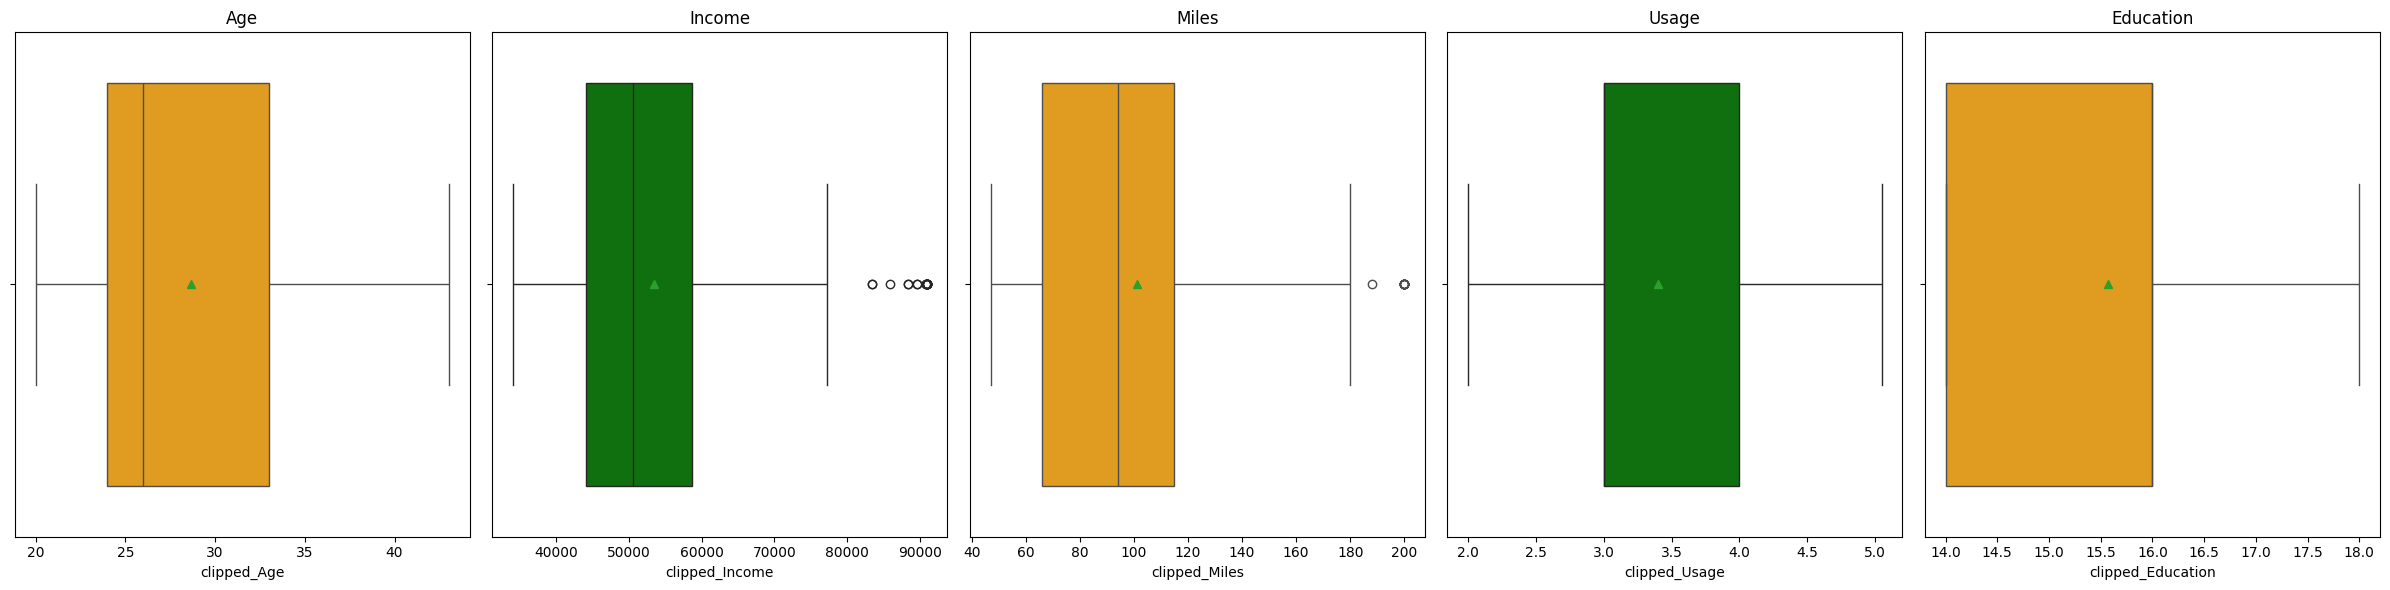

In [66]:
import numpy as np
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 5, figsize=(24, 6))

# Clip and plot 'Age'
lower_bound = np.percentile(df['Age'], 5)
upper_bound = np.percentile(df['Age'], 95)
df['clipped_Age'] = np.clip(df['Age'], lower_bound, upper_bound)
sns.boxplot(x="clipped_Age", showmeans=True, data=df, ax=axes[0], color = 'orange')
axes[0].set_title('Age')

# Clip and plot 'Income'
lower_bound = np.percentile(df['Income'], 5)
upper_bound = np.percentile(df['Income'], 95)
df['clipped_Income'] = np.clip(df['Income'], lower_bound, upper_bound)
sns.boxplot(x="clipped_Income", showmeans=True, data=df, ax=axes[1], color = 'green')
axes[1].set_title('Income')

# Clip and plot 'Miles'
lower_bound = np.percentile(df['Miles'], 5)
upper_bound = np.percentile(df['Miles'], 95)
df['clipped_Miles'] = np.clip(df['Miles'], lower_bound, upper_bound)
sns.boxplot(x="clipped_Miles", showmeans=True, data=df, ax=axes[2], color = 'orange')
axes[2].set_title('Miles')

# Clip and plot 'Usage'
lower_bound = np.percentile(df['Usage'], 5)
upper_bound = np.percentile(df['Usage'], 95)
df['clipped_Usage'] = np.clip(df['Usage'], lower_bound, upper_bound)
sns.boxplot(x="clipped_Usage", showmeans=True, data=df, ax=axes[3], color = 'green')
axes[3].set_title('Usage')

# Clip and plot 'Education'
lower_bound = np.percentile(df['Education'], 5)
upper_bound = np.percentile(df['Education'], 95)
df['clipped_Education'] = np.clip(df['Education'], lower_bound, upper_bound)
sns.boxplot(x="clipped_Education", showmeans=True, data=df, ax=axes[4], color = 'orange')
axes[4].set_title('Education')

plt.tight_layout()
plt.show()

# Findings:

The graphical representation clearly shows that Income and Miles have a significant number of outliers. In contrast, the other variables exhibit only a small presence of outliers by comparison. Age has the fewest outliers, with just 2.78%, while Income has the most, with 10.56%.

# Check if features like marital status, Gender, and age have any effect on the product purchased

In [67]:
df.head(1)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,clipped_Age,clipped_Income,clipped_Miles,clipped_Usage,clipped_Education
0,KP281,18,Male,14,Single,3,4,29562,112,20.0,34053.15,112,3.0,14


In [68]:
df.groupby('MaritalStatus')['Product'].value_counts()
df.groupby('Gender')['Product'].value_counts()
df.groupby('Age')['Product'].value_counts()

Age  Product
18   KP281      1
19   KP281      3
     KP481      1
20   KP481      3
     KP281      2
               ..
47   KP781      1
     KP281      1
48   KP481      1
     KP781      1
50   KP281      1
Name: count, Length: 68, dtype: int64

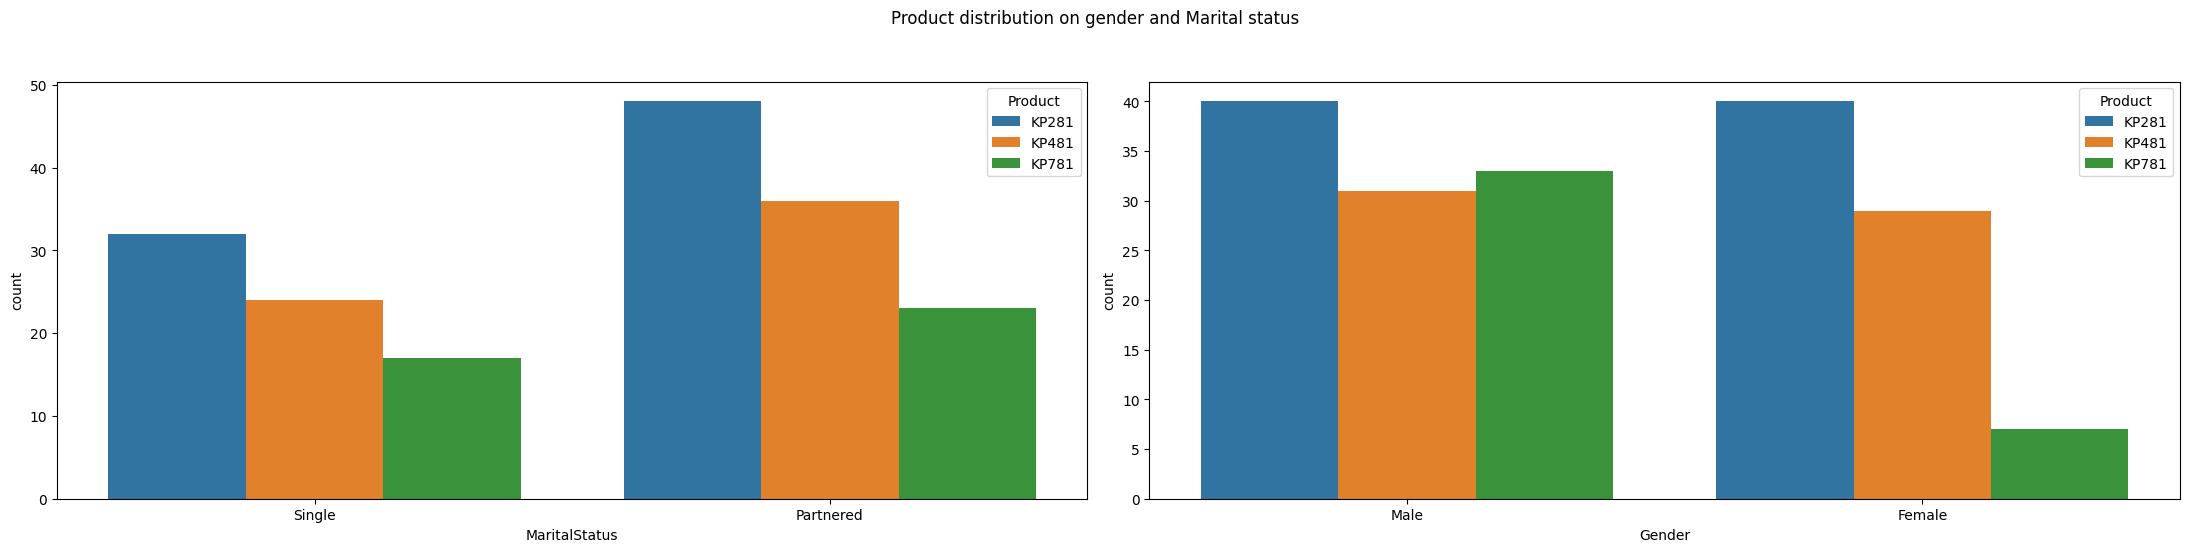

In [69]:
plt.figure(figsize =(22,10))

plt.suptitle('Product distribution on gender and Marital status\n\n',fontsize=12)

plt.subplot(2,2,1)
sns.countplot(data = df, x='MaritalStatus', hue='Product')

plt.subplot(2,2,2)
sns.countplot(data = df, x='Gender', hue='Product')

plt.tight_layout()
plt.show()

#Findings:

From both graphical and non-graphical univariate analyses, it is evident that there are more male customers than female customers. Additionally, partnered customers are more common. We can also observe that product KP281 is most frequently purchased by customers who rate their fitness level as 3, indicating they consider themselves to be moderately fit.

In [70]:
continuous_var = ['Age', 'Education', 'Income', 'Usage', 'Fitness', 'Miles']

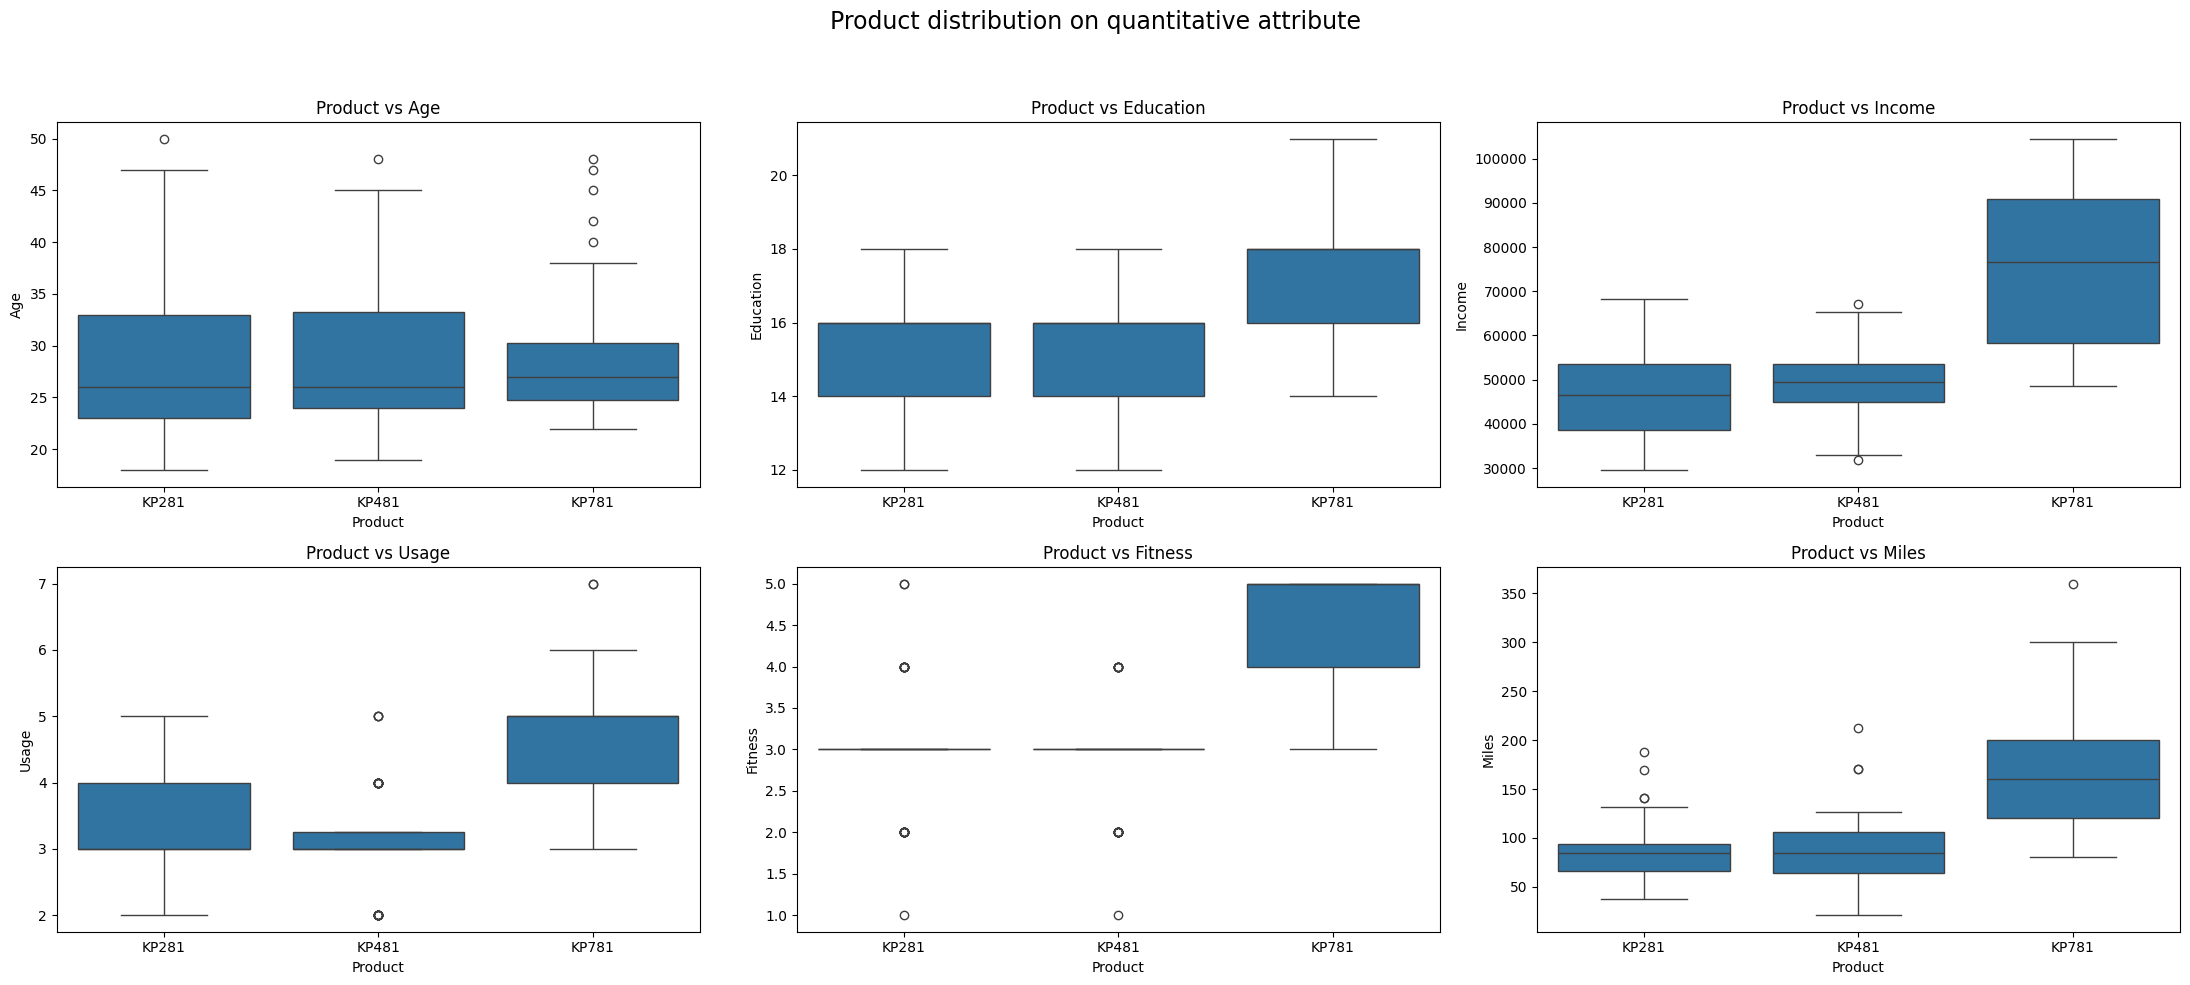

In [71]:
fig,axes = plt.subplots(2,3,figsize=(22,10))

plt.suptitle('Product distribution on quantitative attribute\n\n', fontsize=17)
axes = axes.flatten()

for i, column in enumerate(continuous_var):
  sns.boxplot(y=df[column], x =df['Product'],ax=axes[i])
  axes[i].set_title(f'Product vs {column.capitalize()}')
  axes[i].tick_params(axis='y',labelsize=10)
  axes[i].tick_params(axis='x',labelsize=10)

plt.tight_layout()
plt.show()

#Observations:

Product vs Age**: Customers purchasing KP281 and KP481 have the same median age. Those aged between 25-30 are more likely to buy KP781.

Product vs Education: Customers with more than 16 years of education are more inclined to purchase KP781, while those with less education have equal chances of buying KP281 or KP481.

Product vs Usage: Customers planning to use the treadmill more than four times a week are more likely to purchase KP781.

Product vs Fitness: More fit customers (fitness level of 3 or higher) are more likely to buy KP781.

Product vs Income: Customers with an income of $60,000 or more are more likely to purchase KP781.

Product vs Miles: Customers who plan to walk or run over 120 miles per week are more likely to buy KP781.

#Multivariable analysis

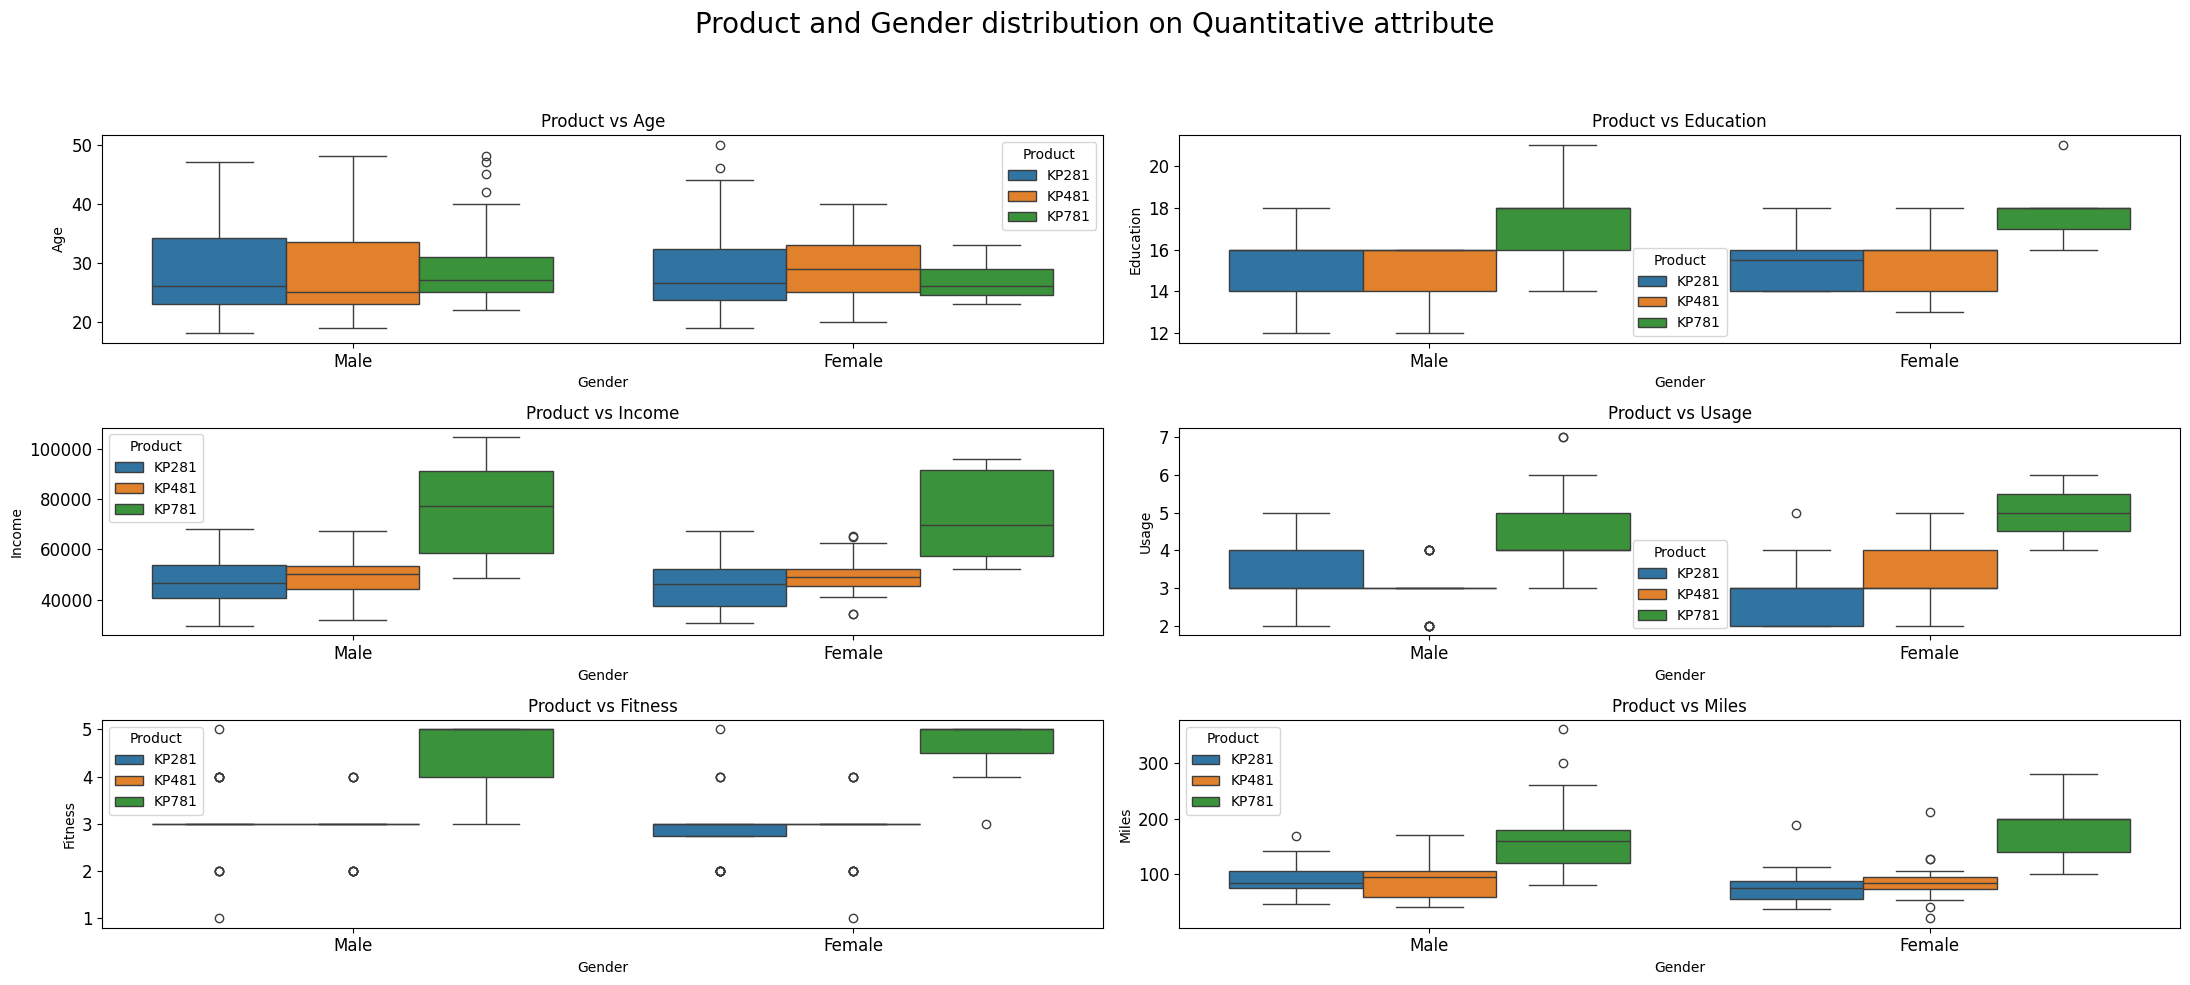

In [72]:
fig,axes = plt.subplots(3,2,figsize=(22,10))
plt.suptitle('Product and Gender distribution on Quantitative attribute\n\n', fontsize=20)
axes = axes.flatten()
for i, column in enumerate(continuous_var):
  sns.boxplot(y=df[column], x =df['Gender'], ax=axes[i], hue=df['Product'])
  axes[i].set_title(f'Product vs {column.capitalize()}')
  axes[i].tick_params(axis='y',labelsize=12)
  axes[i].tick_params(axis='x',labelsize=12)

plt.tight_layout()
plt.show()

Females who are planning to use treadmill 3 to 4 times a week are more likely to buy KP481 product.

#Probability

In [73]:
# Create a crosstab for product purchases
product_crosstab = pd.crosstab(df['Product'], columns = 'count')
product_crosstab

col_0,count
Product,
KP281,80
KP481,60
KP781,40


In [74]:
total_customers = product_crosstab.sum().sum()
product_crosstab['marginal_probability'] = product_crosstab['count'] / total_customers * 100
product_crosstab

col_0,count,marginal_probability
Product,,
KP281,80,44.444444
KP481,60,33.333333
KP781,40,22.222222


In [75]:
products_of_interest = ['KP281', 'KP481', 'KP781']
marginal_probability_of_interest = product_crosstab.loc[products_of_interest, 'marginal_probability']
marginal_probability_of_interest


Product
KP281    44.444444
KP481    33.333333
KP781    22.222222
Name: marginal_probability, dtype: float64

#Observations:

Based on the provided data, the KP281 treadmill is the most popular, followed by the KP481 and then the KP781. Approximately 44.44% of customers prefer the KP281, 33.33% prefer the KP481, and 22.22% prefer the KP781.

Customers who plan to use the treadmill more than four times a week are more likely to choose the KP781, as it has a higher purchase likelihood. Similarly, customers with a fitness level of 3 or above may also be more inclined to choose the KP781.

A higher income (equal to or greater than $60,000) may also influence customers to select the KP781 over other options. Additionally, customers who expect to walk or run more than 120 miles per week may show a preference for the KP781.

These insights are valuable for marketing and product positioning strategies, as they highlight potential target segments for each treadmill product.

#Find the probability that the customer buys a product based on each column.

In [76]:
product_crosstab = pd.crosstab(index = df['Gender'], columns ='count')
total_customers = product_crosstab.sum().sum()
product_crosstab['marginal_probability'] = product_crosstab['count'] / total_customers * 100
product_crosstab

col_0,count,marginal_probability
Gender,,
Female,76,42.222222
Male,104,57.777778


In [77]:
product_crosstab = pd.crosstab(index = df['Age'], columns ='count')
total_customers = product_crosstab.sum().sum()
product_crosstab['marginal_probability'] = product_crosstab['count'] / total_customers * 100
product_crosstab

col_0,count,marginal_probability
Age,,
18,1,0.555556
19,4,2.222222
20,5,2.777778
21,7,3.888889
22,7,3.888889
23,18,10.000000
24,12,6.666667
25,25,13.888889
26,12,6.666667


In [78]:
product_crosstab = pd.crosstab(index = df['Income'], columns ='count')
total_customers = product_crosstab.sum().sum()
product_crosstab['marginal_probability'] = product_crosstab['count'] / total_customers * 100
product_crosstab

col_0,count,marginal_probability
Income,,
29562,1,0.555556
30699,1,0.555556
31836,2,1.111111
32973,5,2.777778
34110,5,2.777778
...,...,...
95508,1,0.555556
95866,1,0.555556
99601,1,0.555556


#Crosstable for Gender and Product

In [84]:
gender_product_crosstab = pd.crosstab(index = [df['Gender'], df['Product']], columns = 'count')
gender_product_crosstab

col_0           count
Gender Product       
Female KP281       40
       KP481       29
       KP781        7
Male   KP281       40
       KP481       31
       KP781       33

#Total female customers

In [83]:
total_female_customers = gender_product_crosstab.loc['Female'].sum().sum()
total_female_customers

76

The number of female customers who purchased RP481

In [85]:
female_KP481_customers = gender_product_crosstab.loc['Female', 'KP481'].sum()
female_KP481_customers

29

Conditional probability for the female customers purchased the KP4821 treadmill

In [87]:
condition_probability = female_KP481_customers / total_female_customers * 100
round(condition_probability, 2)

38.16

# Observations:

- Male customers are more likely to purchase KP281 compared to KP781 or KP481.
- Female customers are more likely to purchase KP281 compared to KP481, with KP781 being the least likely purchase.
- These conditional probabilities offer valuable insights into the likelihood of customers purchasing specific products based on their gender.

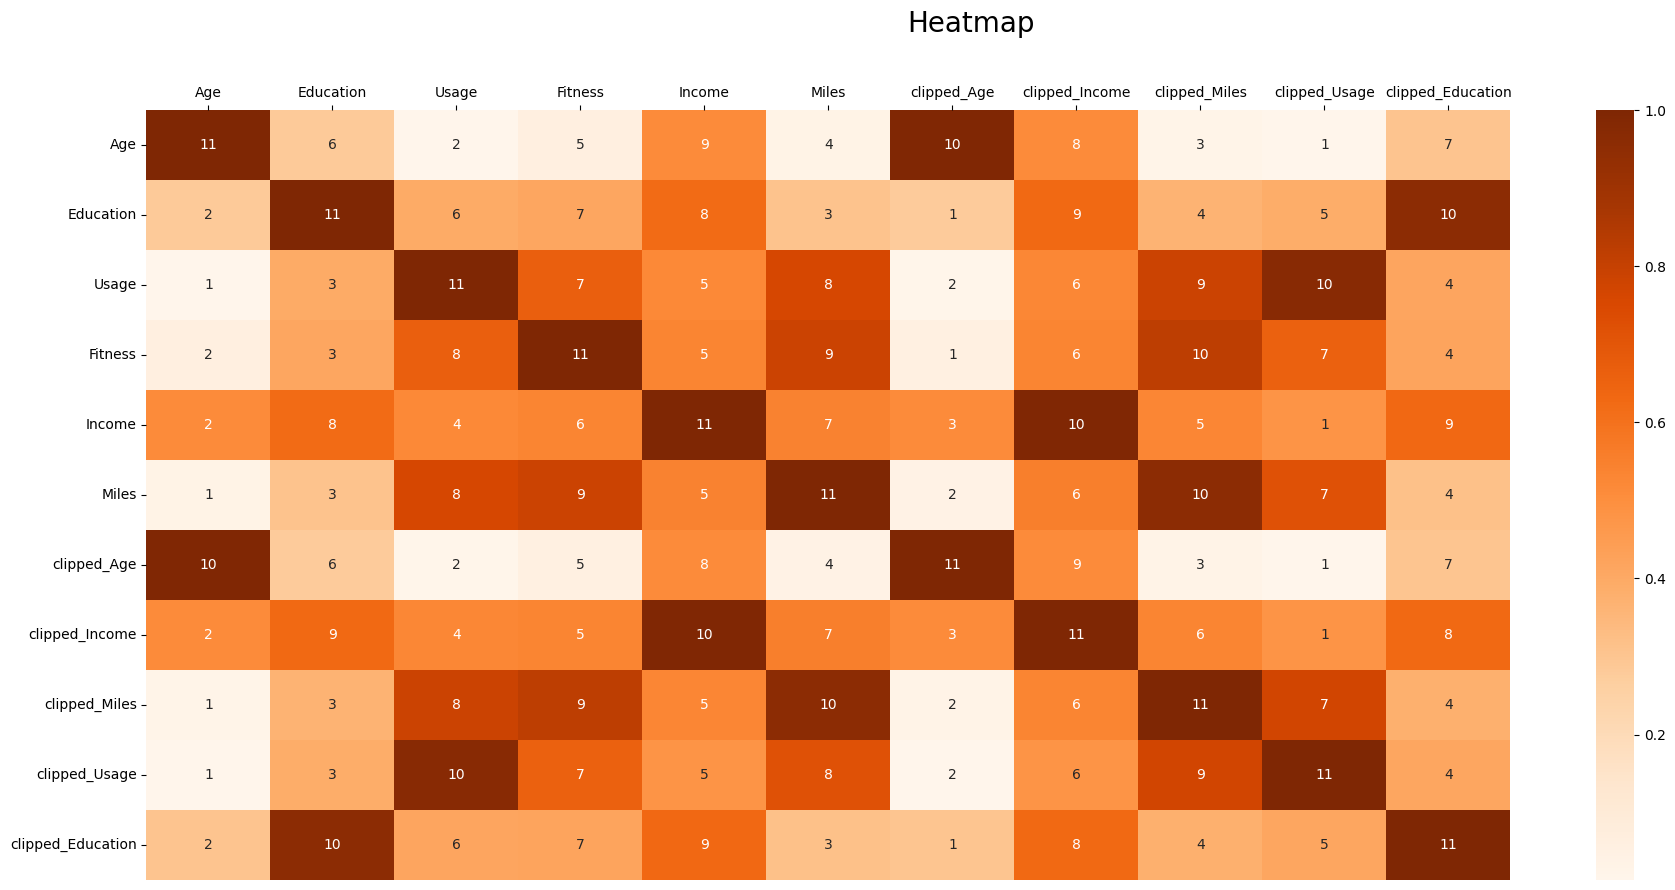

In [97]:
correlation_matrix = df.corr(method='pearson', numeric_only = True)

plt.figure(figsize=(22,10))
plt.suptitle('Heatmap', fontsize= 20)
sns.heatmap(correlation_matrix, annot=correlation_matrix.rank(axis="columns"),cmap='Oranges').xaxis.tick_top()

plt.show()

#Observations

- Male customers are more likely to purchase KP281 than KP781 or KP481.
- Female customers are also more likely to purchase KP281 over KP481, with KP781 being the least likely purchase.
- These conditional probabilities offer valuable insights into the purchasing preferences of customers based on their gender.

#Customer profiling and recommendation

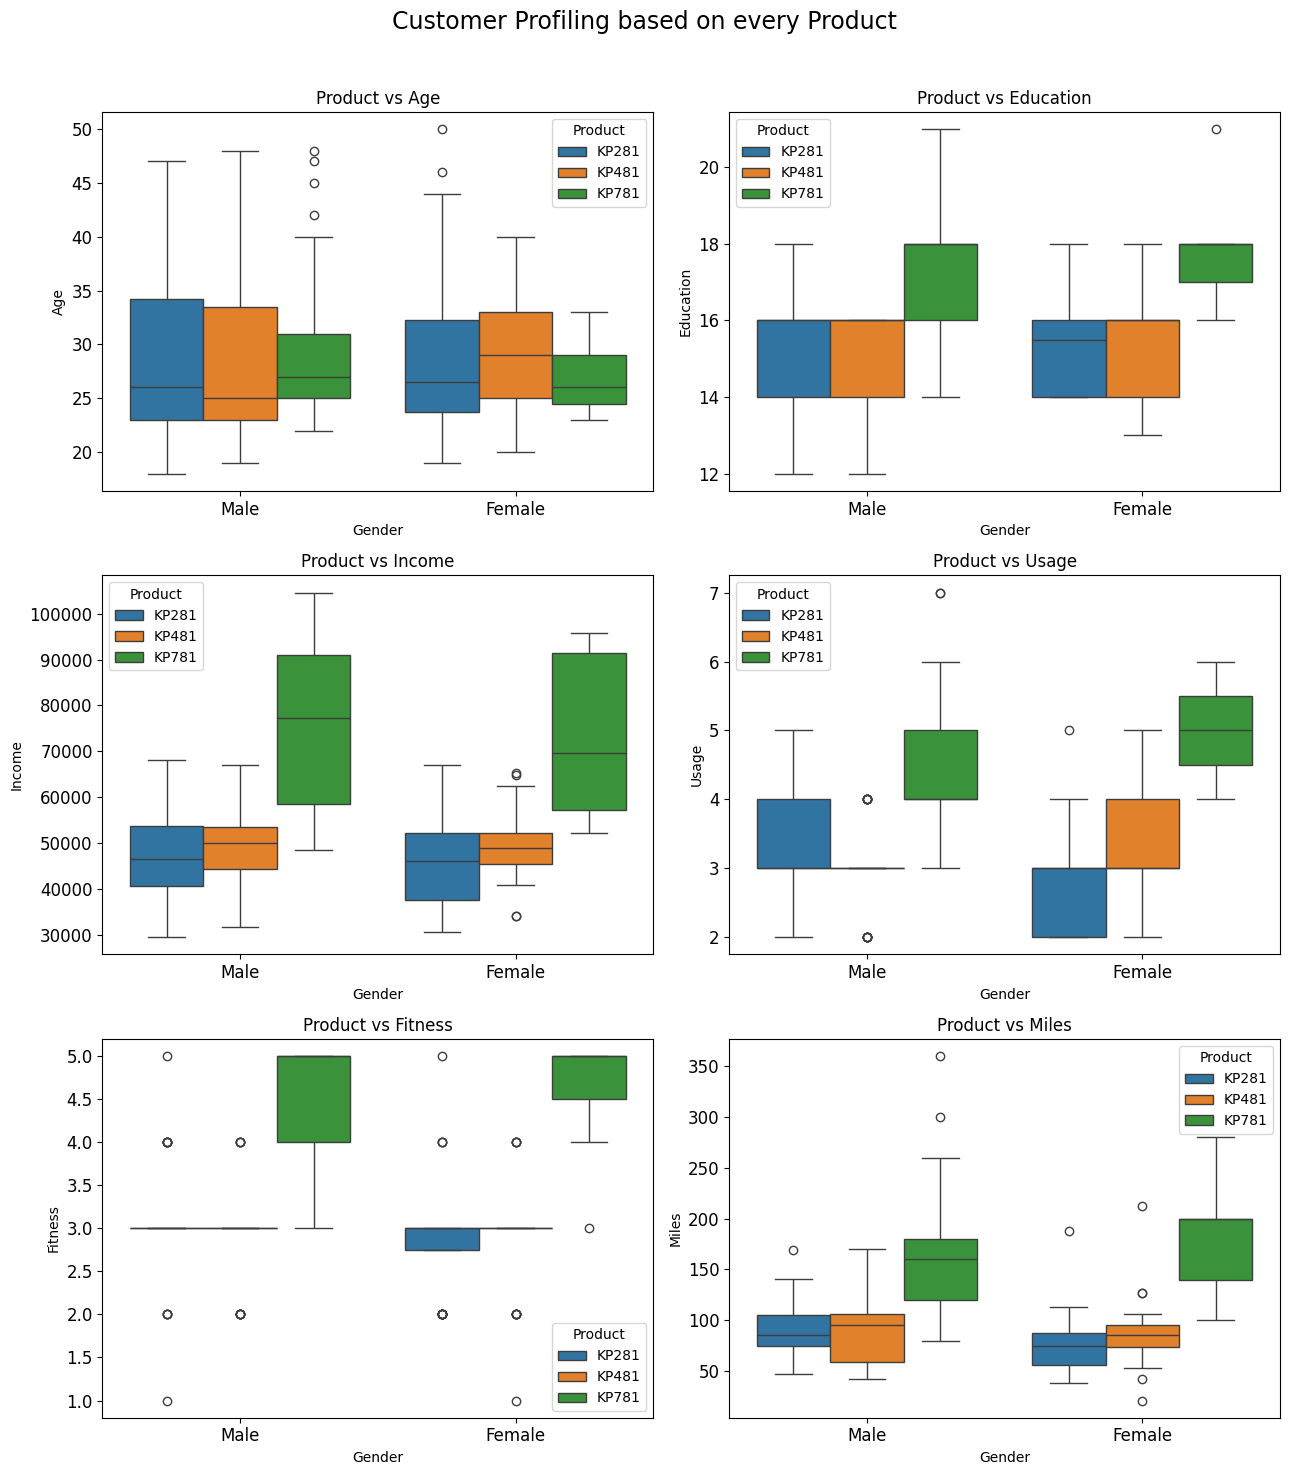

In [101]:
fig,axes = plt.subplots(3,2,figsize=(13,15))
plt.suptitle('Customer Profiling based on every Product\n\n', fontsize=17)
axes = axes.flatten()
for i, column in enumerate(continuous_var):
  sns.boxplot(y=df[column], x =df['Gender'],ax=axes[i], hue=df['Product'])
  axes[i].set_title(f'Product vs {column.capitalize()}')
  axes[i].tick_params(axis='y',labelsize=12)
  axes[i].tick_params(axis='x',labelsize=12)
plt.tight_layout()
plt.show()

#Observations

Customer profiling for each product involves creating a detailed description and understanding of the target customers who are likely to purchase that specific product. This process helps in identifying the characteristics, preferences, and behaviors of the target audience for effective marketing and sales strategies.

Based on the analysis:

- Probability of purchase of KP281 = 44%
- Probability of purchase of KP481 = 33%
- Probability of purchase of KP781 = 22%

Customer Profile for KP281 Treadmill:
- Age: Mainly between 18 to 35 years, with some between 35 to 50 years
- Education: 13 years and above
- Annual Income: Below USD 60,000
- Weekly Usage: 2 to 4 times
- Fitness Scale: 2 to 4
- Weekly Running Mileage: 50 to 100 miles

Customer Profile for KP481 Treadmill:
- Age: Mainly between 18 to 35 years, with some between 35 to 50 years
- Education: 13 years and above
- Annual Income: Between USD 40,000 to USD 80,000
- Weekly Usage: 2 to 4 times
- Fitness Scale: 2 to 4
- Weekly Running Mileage: 100 to 200 miles

Customer Profile for KP781 Treadmill:
- Gender: Male
- Age: Between 18 to 35 years
- Education: 15 years and above
- Annual Income: USD 80,000 and above
- Weekly Usage: 4 to 7 times
- Fitness Scale: 3 to 5
- Weekly Running Mileage: 100 to 200 miles

#Recommendations:

Marketing Strategy:
- KP281: Target females and lower-income customers. Promote affordability and fitness benefits.
- KP781: Target higher-income, possibly male customers. Highlight advanced features and longer mileage.

Product Development:
- Develop longer mileage treadmill models for higher-income customers.
- Enhance KP281 features for broader appeal.

Pricing Strategy:
- Adjust pricing to match the income levels of target segments. Higher prices for advanced features catering to higher-income customers.

Education Campaign:
- Promote the link between education, income, and fitness. Highlight active lifestyle benefits using treadmills.

Customer Segmentation:
- Segment based on activity lifestyle, income, and education. Tailor marketing and product offerings to each segment.

Partnerships:
- Collaborate with fitness influencers or organizations targeting higher fitness levels or incomes.

Customer Insights:
- Continuously collect and analyze customer feedback and usage data. Use insights for customer-centric product development and marketing.

Continuous Improvement:
- Regularly review data to identify emerging trends. Adjust marketing strategies and product offerings as needed.

Creating Customer Profiles:
- Define the Product: Clearly identify and describe the specific product.
- Market Research: Gather data and insights on market, industry, and customer demographics.
- Identify Target Audience: Define target audience based on product features and value propositions.
- Evaluate Customer Characteristics: Understand psychographic factors through interviews, surveys, and data analysis.
- Create Customer Profiles: Compile demographics, psychographics, motivations, challenges, goals, and buying habits.
- Use Customer Profiles for Marketing: Tailor marketing messages, content, and channels to effectively engage the target audience for better product positioning and improved acquisition and retention rates.